## 2.1 분류와 회귀

- 분류 : 클래스 레이블 중 하나 예측
    - 이진 분류: 예/아니오
    - 다중 분류: 셋 이상으로 분류
- 회귀 : 연속적인 숫자 (부동소수점수. 실수) 예측
***

## 2.2 일반화, 과대적합, 과소적합
- 일반화: 모델이 처음 보는 데이터에 대해 정확하게 예측하면 "훈련 세트에서 테스트 세트로 일반화" 된 것  
- 과대적합: 모델이 훈련 세트에 너무 맞춰져서 새로운 데이터에 일반화되지 못함. 너무 복잡한 모델
- 과소적합: 너무 간단한 모델
***

## 2.3 지도 학습 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2.3.2 k-NN

#### forge dataset

In [2]:
import mglearn

# dataset
X, y = mglearn.datasets.make_forge()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.war

X.shape:  (26, 2)


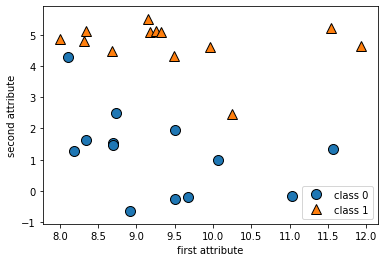

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first attribute")
plt.ylabel("second attribute")
print("X.shape: ", X.shape)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


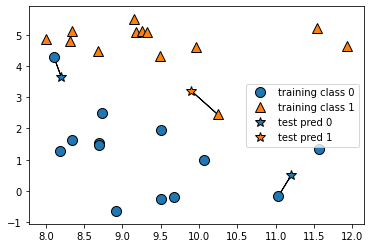

In [4]:
# 1-NN
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


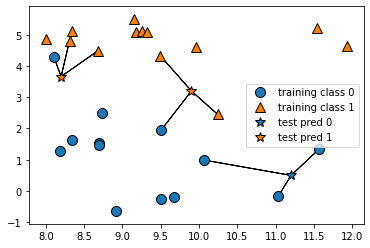

In [5]:
# 3-NN
mglearn.plots.plot_knn_classification(n_neighbors=3)  # select class with more neighbors as label

In [6]:
# split dataset 

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()   # X :data, y :label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# modeling

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# train model
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
# predict

print("Predict Test set:", clf.predict(X_test))

Predict Test set: [1 0 1 0 1 0 0]


In [9]:
# score - accuracy

print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


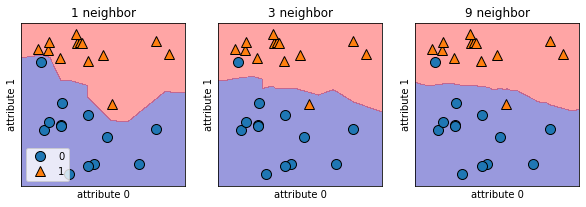

In [10]:
# show decision boundary

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("attribute 0")
    ax.set_ylabel("attribute 1")
    
axes[0].legend(loc=3)


\- 이웃읫 수=1 일때, 결정 경계는 훈련 데이터의 분포를 따라감(= 복잡한 모델)(= 과대적합)  
\- __이웃의 수가 많아질수록 결정 경계 부드러워짐__(= 더 단순해짐)(= 낮은 복잡도)

#### Cancer dataset

In [11]:
# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n", cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
# number of data points & features
print("Breast Cancer Data Shape:", cancer.data.shape)

print("Number of samples per class: \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))} )

Breast Cancer Data Shape: (569, 30)
Number of samples per class: 
 {'malignant': 212, 'benign': 357}


In [13]:
# meaning of each feature
print("feature name: \n", cancer.feature_names)

feature name: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


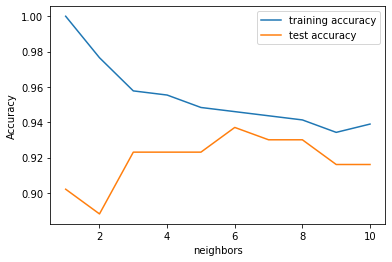

In [14]:
# split dataset 

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []


# n_neighbors : 1 ~ 10
neighbors_settings = range(1,11)

for neighbors in neighbors_settings:
    # modeling
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X_train, y_train)
    # training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    

# plot

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("neighbors")
plt.legend()

### k-NN regression
  
#### wave dataset

Text(0, 0.5, 'target')

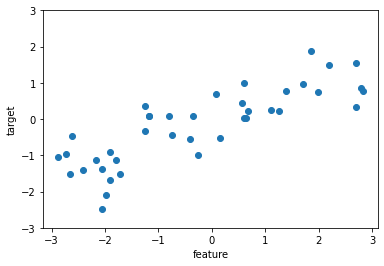

In [15]:
# dataset

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

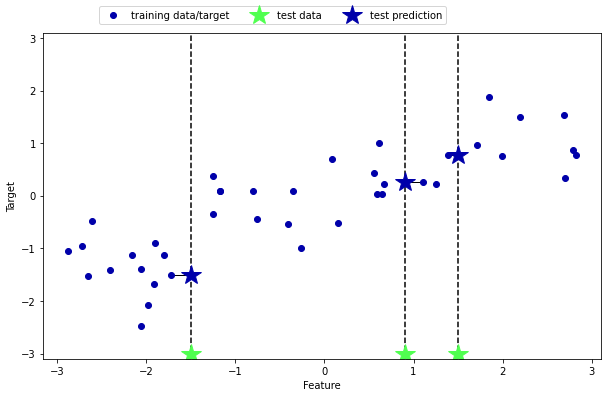

In [16]:
# number of neighbors=1 
mglearn.plots.plot_knn_regression(n_neighbors=1)

\- 이웃의 수=1 일때, __예측값=가장 가까운 이웃의 타깃값__

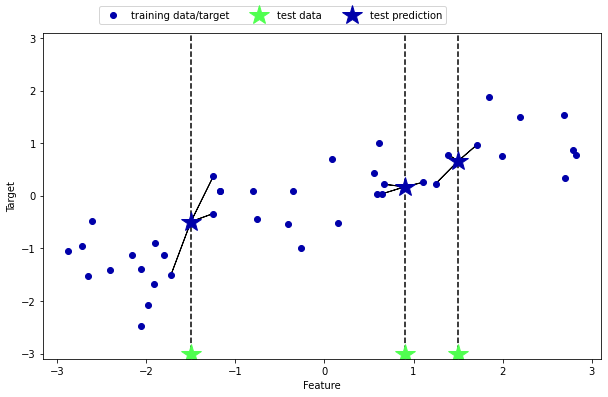

In [17]:
# number of neighbors=3
mglearn.plots.plot_knn_regression(n_neighbors=3)

\- 이웃의 수가 여럿일때, __예측값=이웃값들의 평균__

In [18]:
# KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# modeling
reg = KNeighborsRegressor(n_neighbors=3)

# train model
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [19]:
# predict

print("Predict Test Set: \n", reg.predict(X_test))


Predict Test Set: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [20]:
# score - R^2

print("Test Set R^2: {:.2f}".format(reg.score(X_test, y_test)))


Test Set R^2: 0.83


\- __결정계수 R^2__ : 회귀 모델에서 예측의 적합도 측정
* =1 : 예측이 완벽한 경우
* =0 : 훈련 세트의 출력값인 y_train의 평균으로만 예측
* 음수이면 예측과 타깃이 상반된 경향

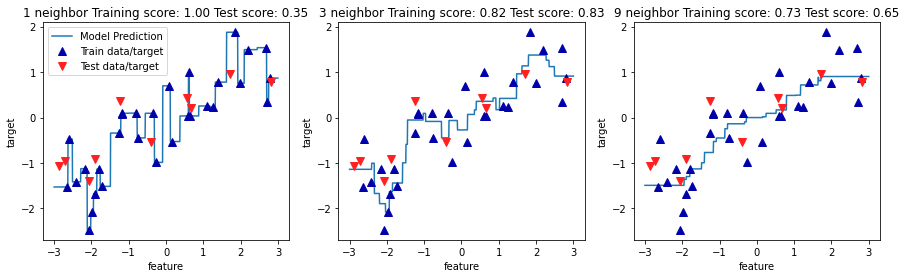

In [21]:
# Prediction for all features

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# create 1000 data points in range (-3, 3)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for neighbors, ax in zip([1,3,9], axes):
    # prediction with 1, 3, 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbor Training score: {:.2f} Test score: {:.2f}".format(
    neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(["Model Prediction", "Train data/target", "Test data/target"], loc='best')


\- 이웃의 수 = 1 일때, 훈련 세트의 데이터 포인트가 예측에 주는 영향이 큼 (=불안정한 예측)  
\- 이웃의 수가 많아질수록 훈련 데이터에는 잘 안 맞더라도 더 안정된 예측이 가능

### 2.3.3 선형 모델
- 입력 특성에 대한 __선형 함수__를 만들어 예측  
훈련 데이터보다 특성이 더 많은 경우, 어떤 타깃 y도 훈련 세트에 대해 완변하게 선형 함수로 모델링 가능

### 선형 회귀 (최소제곱법)
- 예측 ~ 타깃 __평균제곱오차를 최소화__하는 파라미터 w와 b 찾기
    - __w__: 기울기 파라미터 (=가중치)(=계수) → lr.coef_
    - __b__: 편향 파라미터 (=절편) → lr.intercept_
  

#### wave dataset

In [22]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [23]:
# R^2 score

print("Traning Set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(lr.score(X_test, y_test)))

Traning Set score: 0.67
Test Set score: 0.66


\- Training set과 Test set의 R^2 값이 비슷 = 과소적합

#### Boston Housing

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data Shape: ", boston.data.shape)

Data Shape:  (506, 13)


In [25]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)

# R^2 score
print("Traning Set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(lr.score(X_test, y_test)))

Traning Set score: 0.95
Test Set score: 0.61


\- 높은 훈련 세트 점수, 낮은 테스트 세트 점수 = 과대적합 → 복잡도 제어할 모델 필요

### Ridge 리지 회귀
L2 규제
* 규제 : 가중치 w가 0에 가까워지도록 제약 조건 추가
    * 모든 특성이 출력에 주는 영향을 최소화
    * 과대적합이 되지 않도록 모델을 강제로 제한

#### Boston Housing

In [26]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge().fit(X_train, y_train)

# R^2 score
print("Traning Set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(ridge.score(X_test, y_test)))

Traning Set score: 0.89
Test Set score: 0.75


\- 선형 회귀 모델에 비해 훈련 세트의 점수는 낮아졌지만 테스트 세트에 대한 점수는 높아졌다  
= 과대적합이 적어짐  
= 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨
  
\- 테스트 세트에 대한 성능이 궁금하므로 선형회귀가 아닌 리지회귀 모델을 선택해야 한다!

* __alpha 매개변수__를 조정하여 모델을 얼마나 단순화할지 지정  

alpha 값이 커질수록 계수는 0에 가까워진다 (=제약이 많아짐)(=성능 나빠짐)(=더 일반화됨)  
최적의 alpha 값은 데이터셋에 따라 다르다

In [27]:
# Ridge Regression: 기본값 alpha = 1.0 → alpha = 10

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

# R^2 score
print("Traning Set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Traning Set score: 0.79
Test Set score: 0.64


In [28]:
# Ridge Regression: 기본값 alpha = 1.0 → alpha = 0.1

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# R^2 score
print("Traning Set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Traning Set score: 0.93
Test Set score: 0.77


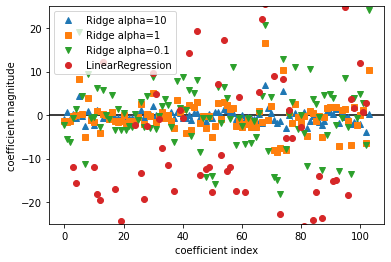

In [43]:
# 선형 회귀와 alpha 값에 따른 리지 회귀의 계수 크기 비교 plot

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

\- alpha = 10 일때 : 대부분 계수 범위 -3 ~ 3  
\- alpha 값 작아질수록 모델의 계수는 커짐

* __학습 곡선__ : 데이터 크기에 따른 모델의 성능 변화  
alpha 값 고정. 훈련 데이터 크기 변화

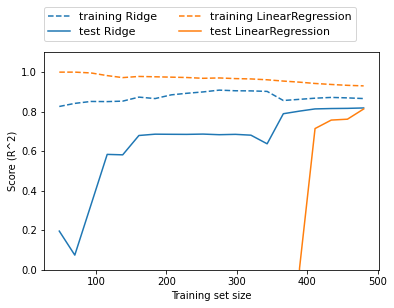

In [29]:
# Linear Regression & Ridge (alpha=1)

mglearn.plots.plot_ridge_n_samples()


1. 예상대로 Test set 보다 Training set의 점수가 더 높다.  
2. 리지는 규제가 적용되었으므로 선형회귀보다 훈련 점수가 낮다.  
3. 데이터가 많아질수록 모델의 성능이 좋아진다.  
4. 데이터가 충분히 주어지면 리지회귀와 선형회귀의 성능이 같아질 수 있다.(규제항이 덜 중요해지기 때문)  
5. 데이터가 많아질수록 선형회귀의 훈련 데이터 성능이 감소한다.(과대적합이 어려워지기 때문)

### Lasso 라소 회귀
L1 규제
* 계수를 0에 가깝게 만들려 노력  
    * 어떤 계수는 진짜로 0이 됨  
    =완전히 제외되는 특성 발생  
    =자동적으로 feature selection

#### Boston Housing

In [30]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso().fit(X_train, y_train)

# R^2 score
print("Traning Set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ !=0))

Traning Set score: 0.29
Test Set score: 0.21
Number of features used: 4


\- 훈련 세트와 테스트 세트의 점수가 모두 낮음 = 과소 적합  
\- 104개의 특성 중 4개의 특성만 사용됨  
  
→ 과소적합을 줄이기 위해 alpha 값 줄이기, max_iter 늘리기

In [34]:
# Lasso Regression: 기본값 alpha = 1.0 → alpha = 0.01

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

# R^2 score
print("Traning Set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ !=0))

Traning Set score: 0.90
Test Set score: 0.77
Number of features used: 33


alpha 값을 낮추면?  
→ 모델의 복잡도 증가  
→ 훈련 세트 & 테스트 세트에서의 성능 향상  
→ 모든 특성을 사용하지 않았으므로 모델 분석이 조금 더 쉬움  
  
alpha 값을 너~무 낮추면?  
→ 규제 효과 없어져 과대적합

In [35]:
# Lasso Regression: 기본값 alpha = 1.0 → alpha = 0.0001

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

# R^2 score
print("Traning Set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test Set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ !=0))

Traning Set score: 0.95
Test Set score: 0.64
Number of features used: 96


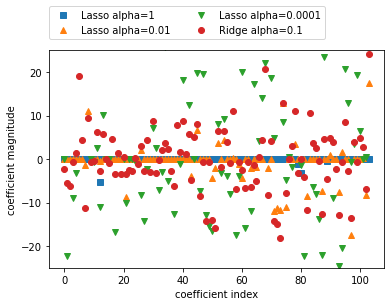

In [36]:
# 리지 회귀와 alpha 값에 따른 라소 회귀의 계수 크기 비교 plot

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")

plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0, 1.05))

alpha = 1    : 계수 대부분이 0이거나 작음  
alpha = 0.01 : 대부분 특성이 0  
alpha = 0.0001:계수가 커져 규제를 적게받는 모델  
  
Ridge(alpha=0.1): 0이 되는 계수 없음 

  

### 분류용 선형 모델
  
* __이진 분류__ : 예측값을 임계치 0 과 비교
    * \> 0 : 예측 클래스 +1
    * < 0 : 예측 클래스 -1
    
    
* __결정 경계__ : 입력의 선형 함수
    * 선형 분류기 : 선, 평면, 초평면을 사용해 두 개의 클래스를 구분하는 분류기

__1. Logistic Regression__  
__2. Support Vector Machine (LinearSVC)__
* 기본적으로 L2 규제 사용

#### forge dataset - logreg, svc

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


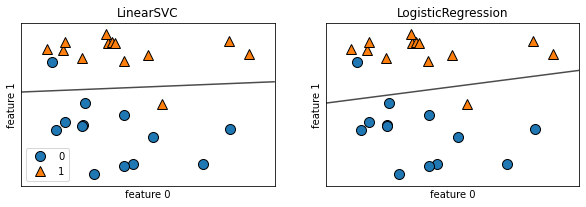

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# dataset
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

# modeling
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend()


* __매개변수 C__ : 규제 강도 결정
    * C 값 높일수록 규제 감소 (= 훈련 세트에 최대한 맞춤)(= 각 데이터 포인트 최대한 정확히 분류)
    * C 값 줄일수록 모델의 계수 벡터 w는 0에 가까워짐 (= 다수의 데이터 포인트에 맞춤)

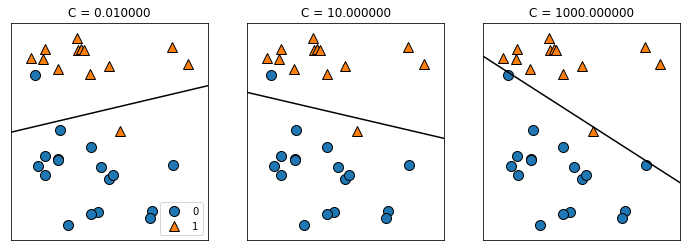

In [38]:
# C 값에 따른 LinearSVC plot
mglearn.plots.plot_linear_svc_regularization()

#### Cancer dataset - logreg

In [39]:
# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)

# score - accuracy
print("Traning Set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test Set score: {:.3f}".format(logreg.score(X_test, y_test)))


Traning Set score: 0.953
Test Set score: 0.958


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


\- 훈련 세트와 테스트 세트 모두 95% 정확도 (좋은 성능)  
\- 두 세트의 성능이 매우 비슷 = 과소적합  
  
→ C 증가 : 모델 제약 줄이기  

In [40]:
# Logistic Regression :  C=1 → C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

# score
print("Traning Set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test Set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Traning Set score: 0.972
Test Set score: 0.965


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


\- 정확도 향상 = 복잡도 높은 모델일수록 좋은 성능  
  
→ C 감소 : 모델 규제 강화시키면?

In [41]:
# Logistic Regression :  C=1 → C=0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

# score
print("Traning Set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test Set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Traning Set score: 0.934
Test Set score: 0.930


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


\- 훈련 세트와 테스트 세트의 정확도는 매개변수가 기본값일 때보다 감소

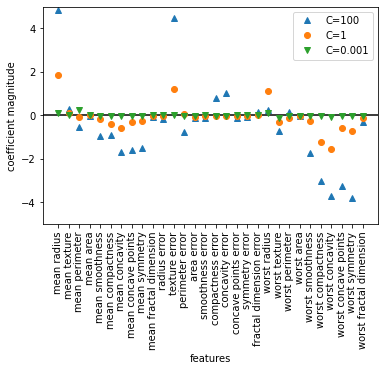

In [42]:
# 매개변수 C 값에 따른 모델 계수 확인 plot
# LogisticRegression 사용 = L2 규제 적용

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)

plt.xlabel("features")
plt.ylabel("coefficient magnitude")
plt.legend()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


L1 logistic regression training accuracy C=0.001: 0.91
L1 logistic regression test accuracy C=0.001: 0.92
L1 logistic regression training accuracy C=1.000: 0.96
L1 logistic regression test accuracy C=1.000: 0.96
L1 logistic regression training accuracy C=100.000: 0.99
L1 logistic regression test accuracy C=100.000: 0.98


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


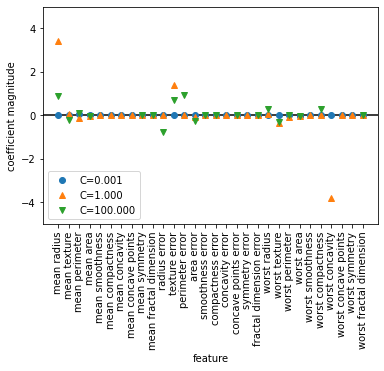

In [43]:
# L1 규제 사용 

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("L1 logistic regression training accuracy C={:.3f}: {:.2f}".format(
         C, lr_l1.score(X_train, y_train)))
    print("L1 logistic regression test accuracy C={:.3f}: {:.2f}".format(
         C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel("coefficient magnitude")

plt.ylim(-5,5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델
* 일대다(one-vs-rest) 방법: 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장
    * 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습
    * 클래스의 수만큼 이진 분류 모델 생성
    * 예측값 = 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스

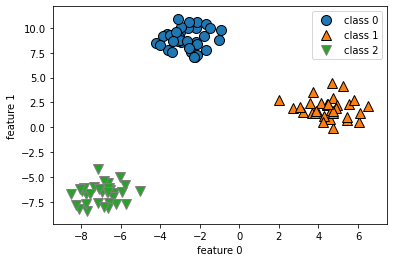

In [44]:
# dataset with 3 classes

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])

In [45]:
# train LinearSVC

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


\- coef_ 행 : 3 개의 클래스에 각각 대응하는 계수 벡터 coefficient vector  
\- coef_ 열 : 각 특성에 따른 계수 값 (이 경우 데이터셋의 특성은 2개)  
\- intercept_: 각 클래스의 절편 (1차원 벡터)

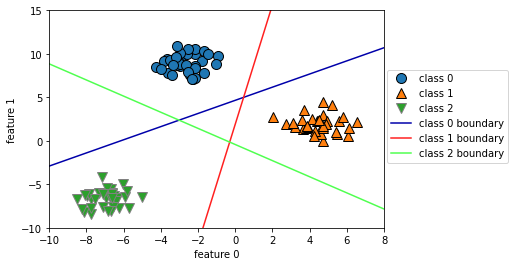

In [46]:
# plot boundary of each binary classifier

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                   mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0','class 1','class 2','class 0 boundary','class 1 boundary','class 2 boundary']
           , loc=(1.01, 0.3))

\- 위의 가운데 삼각형 영역 데이터는?  
→ 데이터와 가장 가까운 직선의 클래스 (= 분류 공식의 결과가 가장 높은 클래스)

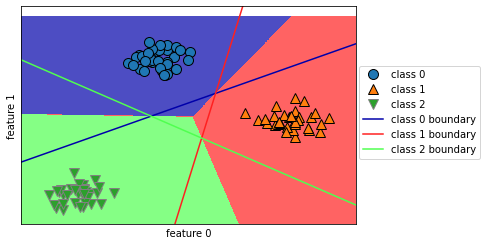

In [47]:
# predicted results for all possible data

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                   mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0','class 1','class 2','class 0 boundary','class 1 boundary','class 2 boundary']
           , loc=(1.01, 0.3))

#### _정리_
* 매개변수
    * 회귀 : alpha - 클수록 모델 단순
    * 분류 : C   - 작을수록 모델 단순  
    
    
* 규제
    * L1 : 중요한 특성이 많이 없을때 / 모델의 해석이 중요한 요소일 때
    * L2
    

### 2.3.4 Naive Bayes 나이브 베이즈 분류기
* GaussianNB : 모든 연속적 데이터  
    * 클래스별 각 특성의 표춘편차 & 평균 계산  
  
  
* BernoulliNB: 이진 데이터  
    * 각 클래스 특성 중 0이 아닌 것의 갯수 세기  
  
  
* MultinominalNB: 카운트 데이터 (특성:어떤 것을 헤아린 정수 카운트)  
    * 클래스별 특성의 평균 게산  
    
    

### 2.3.5 Decision Tree 결정 트리
* 분류 & 회귀  
  
  
* 예/아니오 질문을 이어나가며 학습  
  
  * __목표__: 가능한 적은 예/아니오 질문으로 학습  
  * __새로운 데이터 포인트에 대한 예측__ : 분할된 영역들 중 어디에 놓이는지 확인
      * __예측 결과__ : 해당 영역의 타깃값 중 다수인 것
      * __회귀 예측__ : 데이터 포인트에 해당되는 리프 노드의 훈련 데이터 평균값 
      

### 결정 트리 복잡도 제어
순수 노드로 이루어진 트리 : 훈련 세트에 대해 100% 정확 = 과대적합, 복잡한 모델  
* 과대 적합 방지 전략  
    1.  __사전  가지치기__ : 트리 생성 일찍 중단 
        - 트리 최대 깊이 제한 (max_depth)
        - 리프 최대 갯수 제한 (max_leaf_nodes)
        - 노드 분할을 위한 최소 포인트 개수 지정 (min_samples_leaf)
    2. (__사후__) __가지치기__ : 트리 생성 후 데이터 포인트 적은 노드 삭제/병합

#### Cancer dataset

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Decision tree - 기본값: 완전한 트리 (모든 리프 노드 = 순수 노드)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# accuracy
print("Traning Set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Traning Set accuracy: 1.000
Test Set accuracy: 0.937


In [49]:
# 트리 가지치기 - 트리 깊이 제한 : 훈련 데이터에 완전히 학습되기 전에 트리 성장 막음

# Decision tree - max_depth=4
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

# accuracy
print("Traning Set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Traning Set accuracy: 0.988
Test Set accuracy: 0.951


### 결정 트리 분석
Cancer dataset 시각화

In [50]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names=["malignant","benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

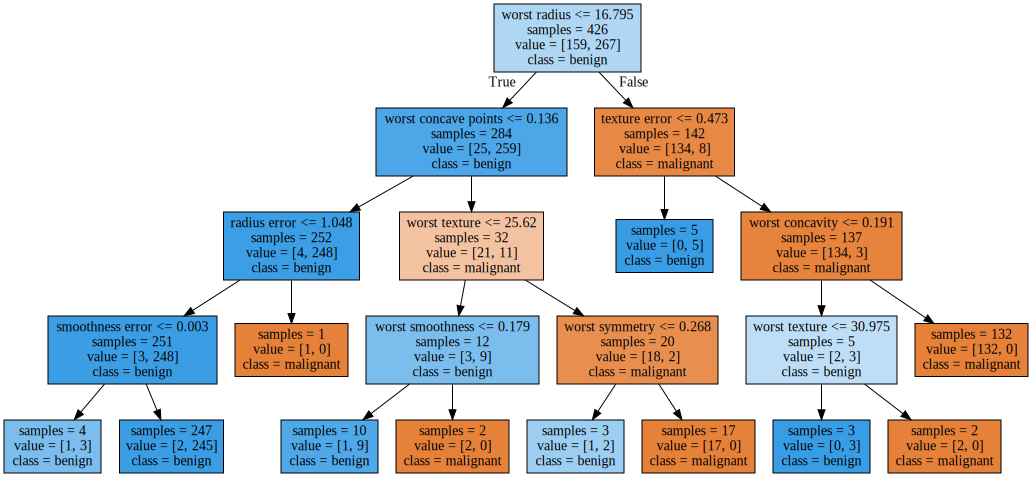

In [51]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도
트리를 만들때, 각 특성이 얼마나 중요한지 평가 
* 0 ~ 1 사이 값
    * =0 : 특성이 전혀 사용되지 않음
    * =1 : 완벽하게 타깃 클래스 예측  
    
    
* 특성 중요도 전체 합=1  


In [52]:
print("feature importances: \n", tree.feature_importances_)

feature importances: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


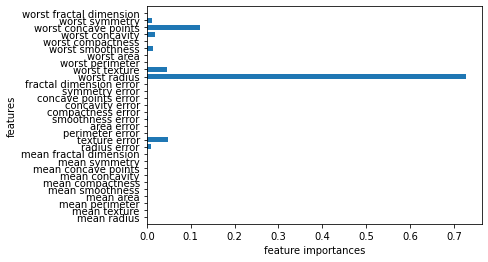

In [53]:
# plot
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

\- 첫 번째 노드에서 사용된 특성 worst radius 가 가장 중요한 특성으로 나타남  
→ 첫 번째 노드에서 클래스를 잘 나누고 있음을 확인  
  
\- 서로 다른 특성이 동일한 정보를 지니는 경우, 그 중 한 특성의 중요도가 낮게 나타날 수 있다.  
→ 특성 중요도가 낮다고 특성이 유용하지 않은 것은 아님  
  
\- 특성이 어떤 클래스를 지지하는지는 알 수 없다. (중요한 특성만 알려줄 뿐, 해당 특성의 의미는 모른다)

Feature importances: [0. 1.]


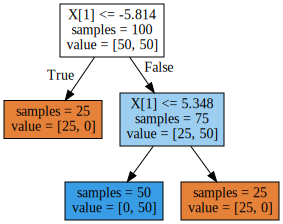

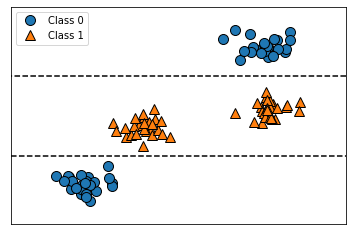

In [54]:
# feature - class relationship

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

\- dataset: 특성 2. 클래스 2.  
  
\- X[0]의 특성은 사용되지 않고 X[1]의 특성만 사용되었지만, X[1] 특성과 출력 클래스의 관계를 정의하기는 어렵다 (비례도 반비례도 아님)

### 회귀 결정 트리 DecisionTreeRegressor
  
#### Ram Price dataset

Text(0, 0.5, 'price ($/Mbyte)')

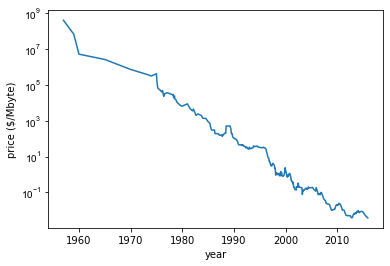

In [55]:
import os

# dataset
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

# plot data
plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)  # y-axis : logscale
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")

In [56]:
# Predict price - DecisionTreeRegressor VS. LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data before 2000 to forecast price after 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict price based on dates
X_train = data_train.date[:, np.newaxis]
# log-transform : simpler data - target relationship
y_train = np.log(data_train.price)


# models
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict for all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)



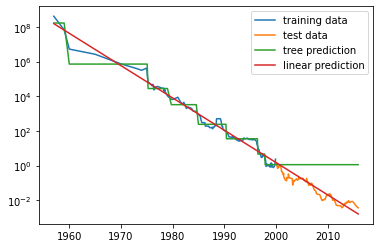

In [57]:
# plot
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="linear prediction")
plt.legend()

### 2.3.6 결정 트리 앙상블 Ensemble
__앙상블__ : 여러 머신러닝 모델 연결해서 더 강력한 모델 만들기

### 랜덤 포레스트 
: 조금씩 __다른__ 여러 결정 트리의 묶음  
  → 트리 생성시 randomness 부여  
  1. 트리 생성시 데이터 포인트 무작위 선택
  2. 분할 테스트시 특성 무작위 선택
  
: 서로 다른 방향으로 과대적합된 트리들의 결과의 평균  
  → 트리 모델의 예측 성능 유지, __과대적합 감소__

### 랜덤 포레스트 구축  

1. 트리 생성을 위한 데이터의 __부트스트랩 샘플 bootstrap sample__ 생성
    * 생성할 트리들이 완전히 독립적일 수 있도록 __무작위 선택__  
    * 한 샘플 __여러번 중복 추출__ 가능 
        * n_samples 개의 데이터 포인트 중에서 무작위로 n_samples번 데이터 반복 추출
        * 일반적으로 데이터 포인트의 1/3은 누락됨  
    * 랜덤 포레스트의 트리가 조금씩 다른 데이터셋으로 이용해 만들어지도록 한다  
    
    
2. 중복 허용으로 만들어진 데이터셋으로 __결정트리 생성__  

    * 알고리즘이 각 노드에서 __후보 특성__을 __무작위 선택__  
        * 트리의 수 : __n_estimators__
            * 클수록 과대적합 줄이므로 더 좋음! (더 안정적인 모델)
    
        * 특성의 수 : __max_features__ 로 조정
            * max_features 키우면  
            \- 랜덤 포레스트의 트리들 비슷  
            \- 특성 선택 randomness 감소  
            \- 가장 두드러진 특징 이용해 데이터에 잘 맞춰짐  
            
            * max_features 낮추면  
            \- 트리들이 달라짐  
            \- 데이터에 맞추기 위해 각 트리의 깊이는 깊어짐  
            
    * 후보 특성들 중 최선의 테스트 찾음
        * 후보 특성 선택은 매 노드마다 반복
        * 트리의 각 노드는 다른 후보 특성들 사용하여 테스트  
        
    * 트리의 각 분기는 서로 다른 특성 부분집합을 사용  
    
    
3. 랜덤 포레스트로 예측
    * 모델에 있는 모든 트리의 예측을 만듦
        * __회귀__ : 최종 예측 = 예측들의 평균
        * __분류__ : soft voting - 알고리즘별로 각 출력 레이블에 대한 확률 제공 (간접예측)  
            → 최종 예측 = 확률 평균이 가장 높은 클래스

### 랜덤 포레스트 분석
  
#### two_moon dataset - random forest (5 trees)

In [58]:
from sklearn.ensemble import RandomForestClassifier

# dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, # 라벨명 : train/test 나누기 전의 라벨 비율 유지하면서 split
                                                    random_state=42)

# model - random forest
forest = RandomForestClassifier(n_estimators=5, random_state=2)

# train
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

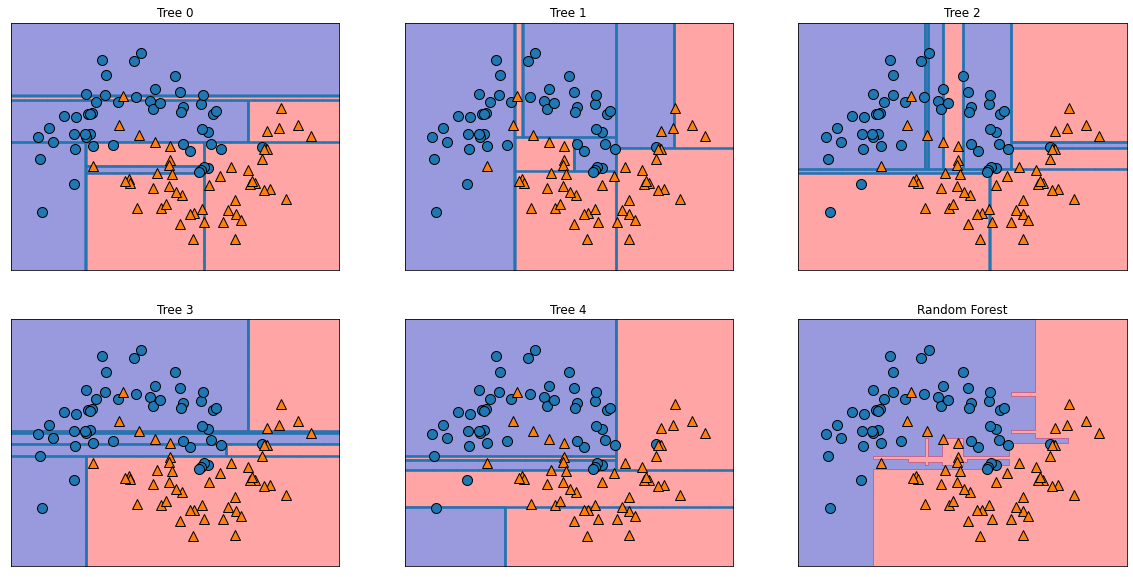

In [59]:
# plot

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

\- 5개의 트리가 만든 결정 경계가 서로 다른것을 확인  
\-부트스트랩 샘플링 결과: 한 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있음 = 각 트리는 불완전  
\-랜덤 포레스트 결과는 덜 과대적합, 더 좋은 결정 경계 만들어짐  
→ 트리 수 많아지면 더 부드러운 결정 경계

#### Cancer dataset - random forest (100 trees)

In [60]:
# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# model - random forest (default)
forest = RandomForestClassifier(n_estimators=100, random_state=0)

# train model
forest.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(forest.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(forest.score(X_test, y_test)))


Training Set accuracy : 1.000
Test Set accuracy : 0.972


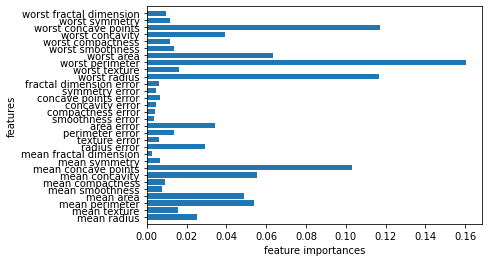

In [61]:
# feature importance

plot_feature_importances_cancer(forest)

\- 각 트리의 특성 중요도 취합하여 랜덤 포레스트의 특성 중요도 계산  
\- 단일 트리에 비해 0 보다 큰 특성 중요도 값을 지닌 특성이 훨씬 많다.

### 그래디언트 부스팅 회귀 트리
* 여러 개의 결정 트리를 이용하여 강력한 모델을 만드는 앙상블 방법 중 하나
* 회귀 & 분류
* 랜덤 포레스트와 다른 점: __이전 트리의 오차를 보완하며 순차적으로 트리 생성__
    * 여러개의 간단한 모델 (약한 학습기) 연결
    * 각각의 트리는 일부 데이터에 대해서만 좋은 예측
    * 트리 많을수록 성능 향상  
    * 무작위성은 없지만 __사전 가지지치 강력__
    
    
* __learning_rate__ : 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어
    * 학습률 클수록 강한 보정 = 복잡한 모델 (과대 적합 가능성 증가)
* __n_estimators__ : 트리의 수
    * 클수록 앙상블에 트리의 수 증가 = 복잡한 모델

#### Cancer dataset 
\- __default__ ( max_depth=3, n_estimators=100, learning_rate=0.1)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# model - gradient boosted regression tree (default)
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)

# train model
gbrt.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))



Training Set accuracy : 1.000
Test Set accuracy : 0.965


\- 훈련 세트 정확도 100% = 과대적합  
→ 트리의 최대 깊이 줄여 사전 가지지치 강하게 or 학습률 낮추기 (= 복잡도 감소)

In [63]:
# model - decrease max_depth (max_depth = 1)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

# train model
gbrt.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training Set accuracy : 0.991
Test Set accuracy : 0.972


In [64]:
# model - decrease learning_rate (learning_rate = 0.01)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

# train model
gbrt.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training Set accuracy : 0.988
Test Set accuracy : 0.965


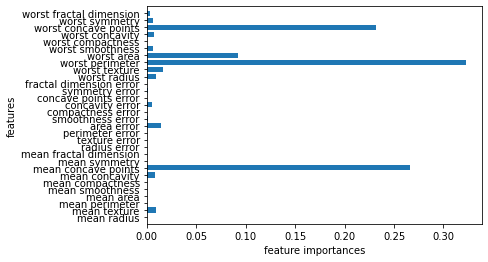

In [65]:
# feature importance

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

\- 랜덤 포레스트와 비슷한 특성 강조 but 일부 특성값=0 (특성 무시)

### 2.3.7 배깅, 엑스트라 트리, 에이다부스트

### 배깅 
: Bagging = Bootstrap aggregating
* 중복 허용한 랜덤 샘플링으로 훈련 세트 생성 & 각 분류기를 다르게 학습  


#### Cancer dataset
\- __logistic regression__ 100개 훈련

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# model
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                            oob_score=True,  # bootstrapping에 포함되지 않은 샘플로 훈련된 모델 평가 (Out-Of-Bag)
                            n_jobs=-1, random_state=42)

# train
bagging.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(bagging.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(bagging.score(X_test, y_test)))
print("OOB sample accuracy: {:.3f}".format(bagging.oob_score_))

Training Set accuracy : 0.962
Test Set accuracy : 0.958
OOB sample accuracy: 0.948


#### two_moons dataset
\- __decision tree bagging__

In [67]:
from sklearn.tree import DecisionTreeClassifier

# dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

# model
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                            n_jobs=-1, random_state=42)

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

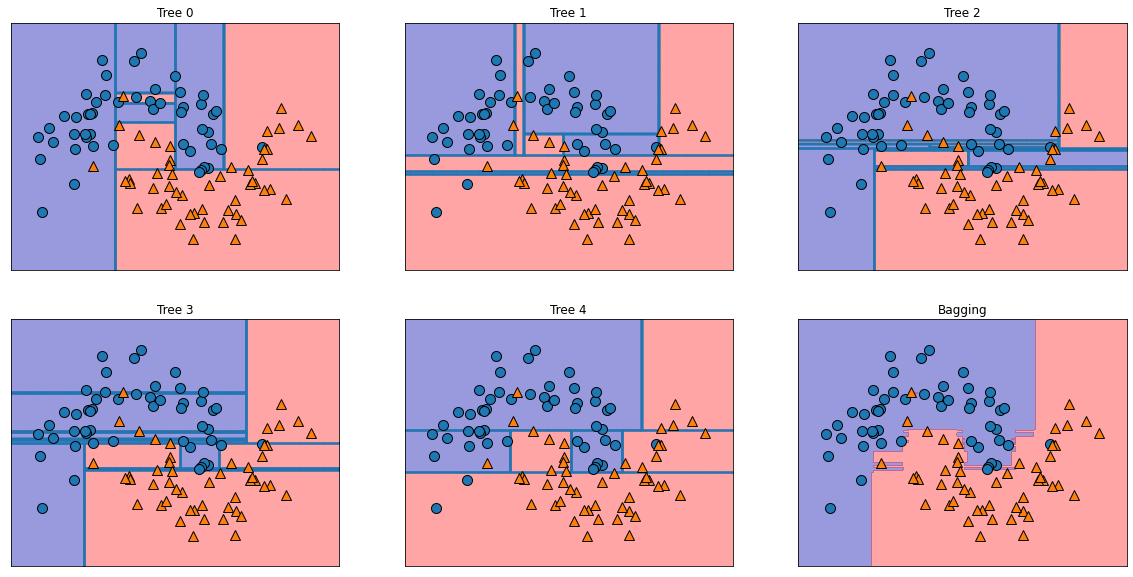

In [68]:
# plot

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, X, fill=True, ax=axes[1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

#### Cancer dataset
\- __decision tree__ 100개 훈련

In [69]:
# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# model
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                            oob_score=True,
                            n_jobs=-1, random_state=42)

# train
bagging.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(bagging.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(bagging.score(X_test, y_test)))
print("OOB sample accuracy: {:.3f}".format(bagging.oob_score_))

Training Set accuracy : 1.000
Test Set accuracy : 0.965
OOB sample accuracy: 0.951


### 엑스트라 트리
* 후보 특성 무작위 분할한 후 최적의 분할 찾기
* DecisionTreeClassifier(splitter='random')
* boostrap sampling 적용 안함!
* 예측값 = 각 트리가 만든 확률값의 평균

#### two_moons dataset

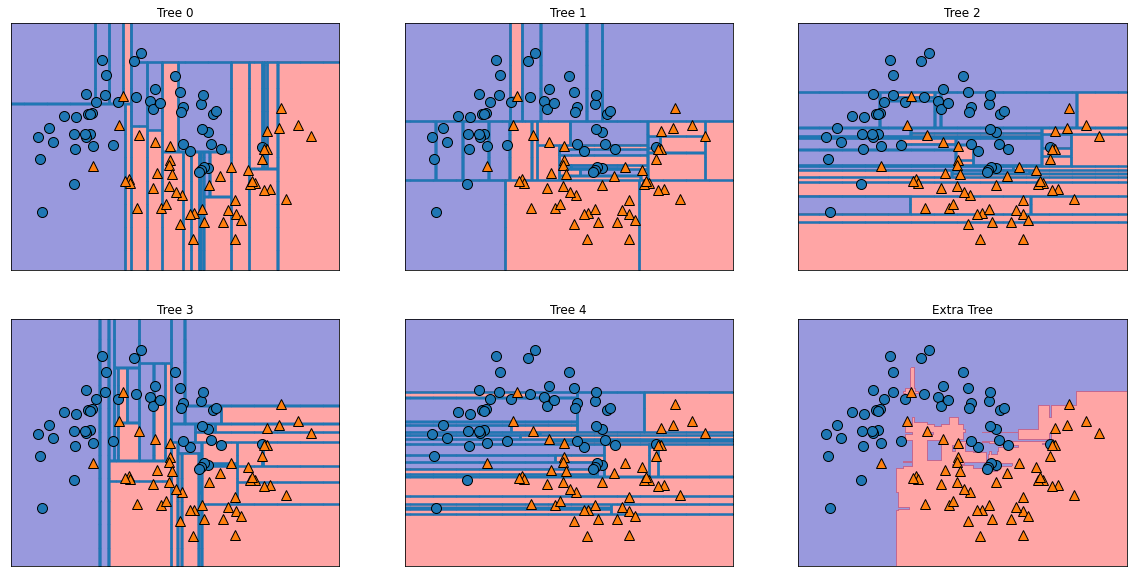

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

# dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

# model
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

# train
xtree.fit(X_train, y_train)

# plot
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Extra Tree")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

\- 후보 노드를 랜던하게 분할한 후 최선의 분할 찾음 = 개별 트리 결정 경계 더 복잡  
\- 개별 트리 앙상블한 엑스트라 트리의 결정경계는 비교적 안정적

#### Cancer dataset
\- __decision tree__ 100개 훈련

In [71]:
# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# model
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)

# train
xtree.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(xtree.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(xtree.score(X_test, y_test)))

Training Set accuracy : 1.000
Test Set accuracy : 0.972


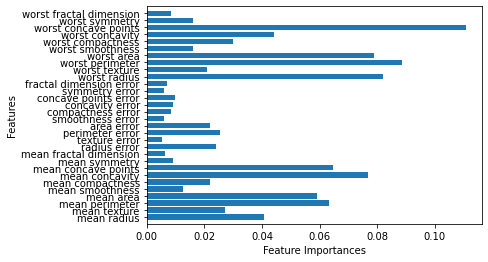

In [72]:
# feature importance

n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

### 에이다부스트
: Adaboost = Adaptive Boosting
* 약한 학습기 사용
* 이전 모델이 잘못 분류한 샘플에 가중치 증가 → 다음 모델 훈련
* 훈련된 각 모델은 성능에 따라 가중치 부여
* 예측 = 모델이 예측한 레이블 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블 선택
  
  
* AdaBoostClassifier
    * default: DecisionTreeClassifier(max_depth = 1)
* AdaBoostRegressor
    * default: DecisionTreeRegressor(max_depth = 3)

#### two_moons dataset

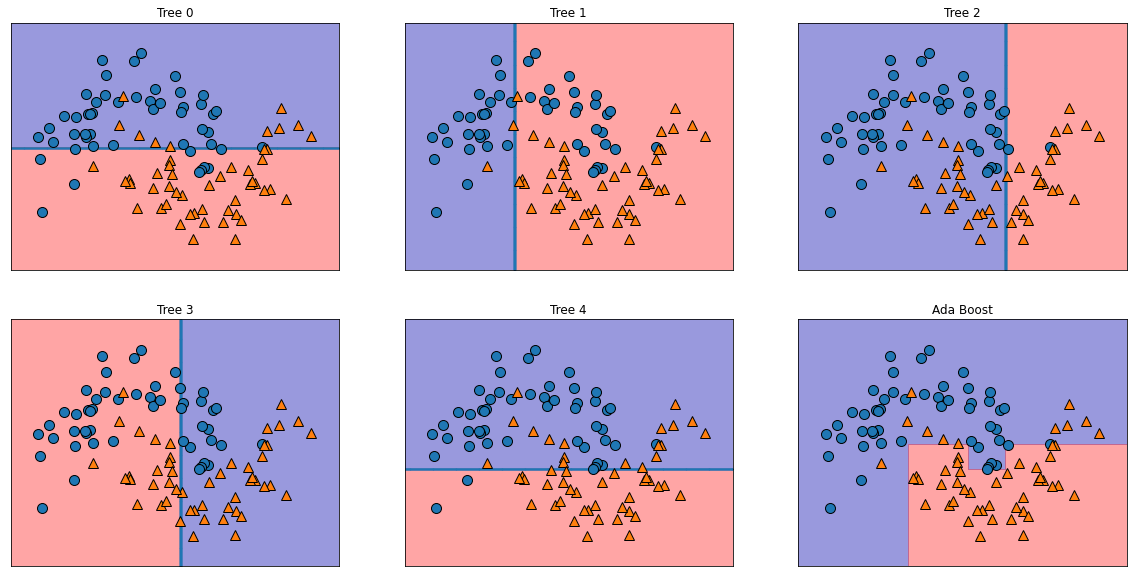

In [73]:
from sklearn.ensemble import AdaBoostClassifier

# dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

# model
ada = AdaBoostClassifier(n_estimators=5,random_state=42)

# train
ada.fit(X_train, y_train)

# plot
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Ada Boost")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

\- 디폴트로 max_depth=1 이므로 각 트리의 결정 경계가 직선 하나로 나타남

#### Cancer dataset

In [74]:
# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# split data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# train
ada.fit(X_train, y_train)

# score - accuracy
print("Training Set accuracy : {:.3f}".format(ada.score(X_train, y_train)))
print("Test Set accuracy : {:.3f}".format(ada.score(X_test, y_test)))

Training Set accuracy : 1.000
Test Set accuracy : 0.986


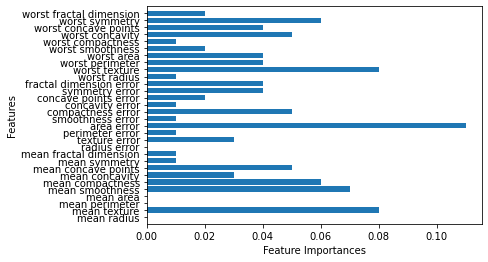

In [75]:
# feature importance

plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

### 2.3.8 커널 서포트 벡터 머신 (SVM)
  
### 선형 모델과 비선형 특성
  
* 선형 모델에 새로운 특성을 추가 → 유연하게
    * 특성끼리 곱
    * 특성을 거듭제곱

#### dataset

Text(0, 0.5, 'feature 1')

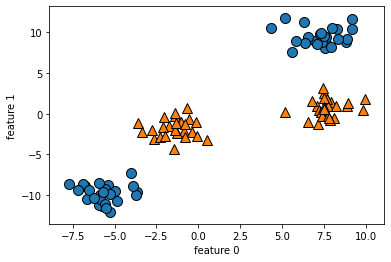

In [76]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)

y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#### 선형 SVM으로 분류

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

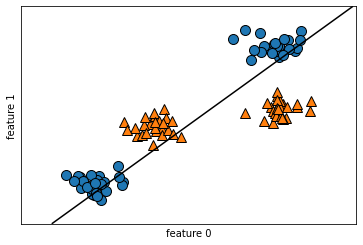

In [77]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#### 입력 특성 확장
\- 새로운 특성 (특성1 ** 2) 추가 

Text(0.5, 0, 'feature1 ** 2')

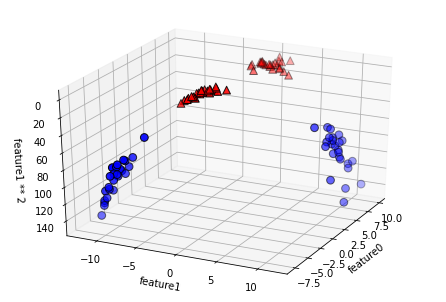

In [78]:
# add new feature 
X_new = np.hstack([X, X[:, 1:] **2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3-D graph
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

#### 3차원에서 평면으로 두 클래스 구분

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

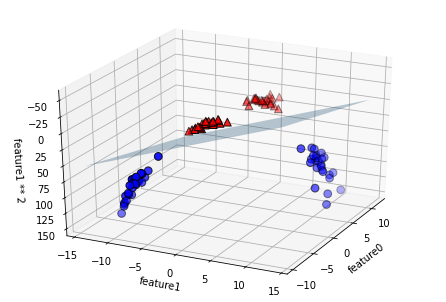

In [79]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

#### 원래 특성으로 투영

Text(-0.029552224598906662, -0.0879685414955162, 'feature1')

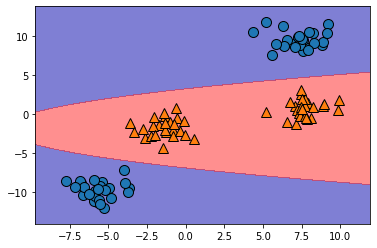

In [80]:
ZZ = YY ** 2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")

### 커널 기법
* 새로운 특성을 만들지 않고서도 고차원에서 분류기를 학습시키는 방법
* 데이터 확장 없이 확장된 특성에 대한 데이터 포인트들의 거리 계산
  
  
1. 다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산
2. 가우시안 커널 (RBF 커널) : 차원이 무한한 특성 공간에 매핑 (모든 차수의 모든 다항식 고려)

### SVM 이해하기
SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지 학습
* __서포트 벡터__
    * 두 클래스 사이의 경계에 위치한 데이터 포인트들
    * 결정 경계를 만드는데 영향을 주는 일부의 훈련 데이터
    * 서포트 벡터의 중요도는 훈련 과정에서 학습
    
    
* 새로운 데이터 포인트에 대한 예측 : 데이터 포인트와 각 서포트 벡터 간 거리 측정  
    * 데이터 포인트 사이의 거리 계산 : 가우시안 커널
        * 매개변수 gamma : 가우시안 커널의 폭 제어
        
        
* 분류 결정 : 서포트 벡터까지의 거리 기반

#### forge dataset

Text(0, 0.5, 'feature 1')

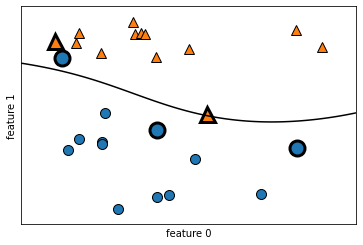

In [81]:
from sklearn.svm import SVC

# dataset
X, y = mglearn.tools.make_handcrafted_dataset()

# SVM model
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)  
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

# data points
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# support vector
sv = svm.support_vectors_

# define class label : dual_coef_ 부호
sv_labels = svm.dual_coef_.ravel() > 0

# plot
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

\- SVM 이용해서 부드러운 비선형 경계 생성  
\- 매개변수 : C, gamma

### SVM 매개변수 튜닝
* gamma : 가우시안 커널 폭의 역수
    * 하나의 훈련 샘플이 미치는 영향의 범위 결정
        * 작은값 = 넓은 영역
        * 큰 값 = 좁은 영역
     * 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐
  
  
* C : 규제 매개변수
    * 각 포인트의 중요도 (dual_coef_ ) 제한

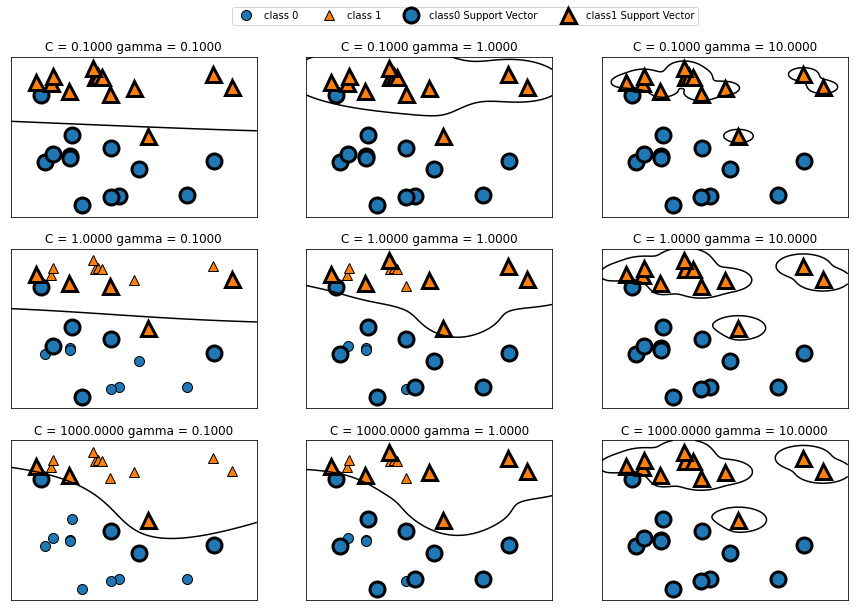

In [82]:
# 매개변수에 따른 plot 변화

fig, axes = plt.subplots(3 ,3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["class 0", "class 1", "class0 Support Vector", "class1 Support Vector"],
                  ncol=4, loc=(.9, 1.2))

__gamma__=0.1 : 가우시안 커널 반경 큼, 부드러운 결정 경계 --------------------------------- __gamma__=10 : 하나의 포인트에 민감, 더 복잡한 모델  
  
__C__ = 0.1  : 제약이 매우 큰 모델, 각 데이터 포인트의 영향력 작음  
|  
|  
__C__ = 1000 : 포인트들이 모델에 큰 영향, 결정 경계가 휘어 정확히 분류하도록 

#### Cancer dataset - RBF 커널 SVM  
\- __default__ : C = 1, gamma = 1 / n_features

In [83]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)


print("Training Set accuracy : {:.2f}".format(svc.score(X_train, y_train)))
print("Test Set accuracy : {:.2f}".format(svc.score(X_test, y_test)))

Training Set accuracy : 1.00
Test Set accuracy : 0.63


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


\- 매우 과대적합된 모델  
\- 매개변수 설정과 데이터 스케일에 매우 민감  
→ 입력 특성의 범위가 비슷하도록 각 특성의 최소값,최대값 로그스케일

Text(0, 0.5, 'Feature magnitude')

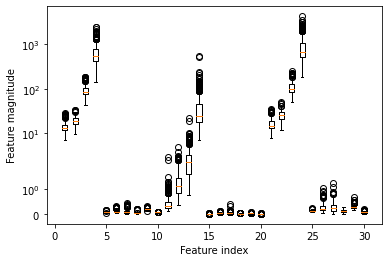

In [84]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

\- 데이터셋 특성의 크기 자리수가 크게 다른 것을 확인  
→ 커널 SVM에 큰 영향을 주므로 전처리 필요

### SVM 을 위한 데이터 전처리
* 특성 값의 범위가 비슷해지도록 조정  
  
  
1. 모든 특성값 평균=0, 분산=1
2. 모든 특성값이 0 ~ 1

#### Cancer data _(cont.)_

In [85]:
# Scale Training Set

## minimum value for each feature in training set
min_on_training = X_train.min(axis=0)

## (max - min) range for each feature in training set
range_on_training = (X_train - min_on_training).max(axis=0)

## scale magnitude : min=0, max=1 for all feaatures
X_train_scaled = (X_train - min_on_training) / range_on_training

print("min. for each feature \n", X_train_scaled.min(axis=0))
print("max. for each feature \n", X_train_scaled.max(axis=0))

min. for each feature 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max. for each feature 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [86]:
# Scale Test Set
X_test_scaled = (X_test - min_on_training) / range_on_training

# model
svc = SVC()
svc.fit(X_train_scaled, y_train)

# score
print("Training Set accuracy : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test Set accuracy : {:.3f}".format(svc.score(X_test_scaled, y_test)))

Training Set accuracy : 0.948
Test Set accuracy : 0.951


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


\- 훈련 세트와 테스트 세트의 정확도 매우 비슷 = 과소적합  
→ C 값 증가 : 모델 더 복잡하게 

In [87]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Training Set accuracy : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test Set accuracy : {:.3f}".format(svc.score(X_test_scaled, y_test)))

Training Set accuracy : 0.988
Test Set accuracy : 0.972


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


\- 모델 성능 (테스트 정확도) 향상  
  
  ***

## 2.4 분류 예측의 불확실성 추정
: 분류기의 예측 불확실성을 추정  
  
불확실성 추정 함수  
 1. decision_function     
 2. predict_proba
  
#### (이진분류)  
#### 예) 2차원 데이터셋 - GradientBoostingClassifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# dataset
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# re-name classes : "blue", "red"
y_named = np.array(["blue", "red"])[y]

# split data
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# model - gradient boosting
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 2.4.1 결정 함수

#### decision_function 으로 결과 예측 
   * 이진 분류에서의 반환값 크기 = n_samples
       * 하나의 열만 존재 (양성 클래스 대응 값)
   * 각 샘플이 하나의 실수값 반환

In [93]:
print("X_test.shape: ", X_test.shape)
print("Decision Function shape: ", gbrt.decision_function(X_test).shape)

X_test.shape:  (25, 2)
Decision Function shape:  (25,)


In [94]:
# show first few results of decision fuction
print("Decision Function : \n", gbrt.decision_function(X_test)[:6])

Decision Function : 
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


결정함수 결과: 부호를 통해 분류 클래스 예측   
\- 양수: 양성 클래스 (클래스 1)에 속하는 것 확인  
\- 음수: 음성 클래스 (다른 클래스) 확인

In [95]:
print("Threshold Decision Function: \n", gbrt.decision_function(X_test) > 0)
print("Prediction: \n", gbrt.predict(X_test))

Threshold Decision Function: 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Prediction: 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


#### classes_ 속성을 통한 predict 함수 결과 재현

In [96]:
# Boolian True/False → 0/1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# use as index for classes_
pred = gbrt.classes_[greater_zero]

# compare results - pred VS. gbrt.predict
print("pred is equal to predictions: ", np.all(pred == gbrt.predict(X_test)))



pred is equal to predictions:  True


이진 분류에서 :  
\- 음성 클래스 = classes_ 의 첫 번째 원소  
\- 양성 클래스 = classes_ 의 두 번째 원소

#### decision_function 값의 범위
*  데이터, 모델 파라미터에 따라 달라짐

In [97]:
decision_function = gbrt.decision_function(X_test)

print("Decision Function min: {:.2f}  max: {:.2f}".format(
        np.min(decision_function), np.max(decision_function)))

Decision Function min: -7.69  max: 4.29


→ 2차원 평면의 모든 점에 대한 decision_function 값

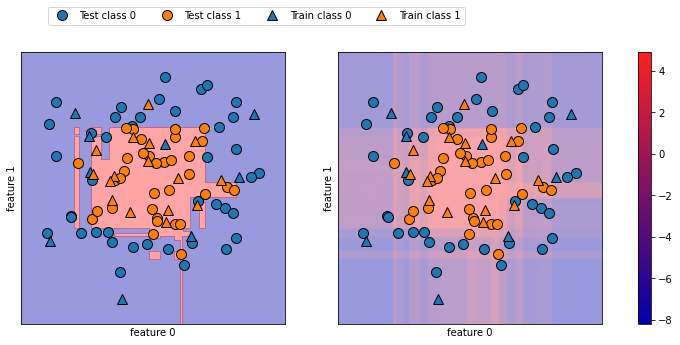

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                      alpha=.4, cm=mglearn.ReBl)

for ax in axes :
    # plot training points & test points
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar .draw_all()

axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"],
                ncol=4, loc=(.1, 1.1))

    - gradient boosting model의 결정 경계        - gradient boosting model 결정 함수

### 2.4.2 예측 확률
#### predict_proba
* 출력 : 각 클래스에 대한 확률
* 이진분류에서의 크기 : (n_samples, 2)

In [103]:
print("Shape of Probabilities: ", gbrt.predict_proba(X_test).shape)


Shape of Probabilities:  (25, 2)


\- 각 행 첫 번째 원소 : 첫 번째 클래스의 예측 확률  
\- 각 행 두 번째 원소 : 두 번째 클래스의 예측 확률  
→ 두 클래스 확률의 합 = 1

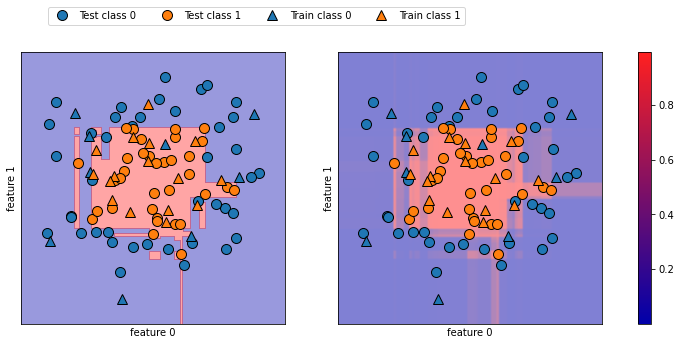

In [105]:
# 예시 데이터를 이용한 결정 경계 & 클래스 1 확률 plot

fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes :
    # plot training points & test points
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar .draw_all()

axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"],
                ncol=4, loc=(.1, 1.1))

    - gradient boosting model의 결정 경계        - gradient boosting model 결정 함수

### 2.3.4 다중 분류에서의 불확실성
  
  
#### iris dataset (3 classes)
* __decision_function 이용__
    * 결과값의 크기 : (n_samples, n_classes)

In [108]:
## Decision Function

# dataset
from sklearn.datasets import load_iris

iris = load_iris()

# split data
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

# model, train
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

# results
print("Decision Function shape: ", gbrt.decision_function(X_test).shape)

# show first few results of decision function
print("Decision Function results: \n", gbrt.decision_function(X_test)[:6, :])

Decision Function shape:  (38, 3)
Decision Function results: 
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


\- 각 열 : 각 클래스에 대한 확신 점수  
  → 클수록 해당 클래스일 확률 높음, 작으면 가능성 낮음  
    
  → 각 데이터 포인트의 가장 큰 값으로 결과 예측

In [111]:
## class prediction for each data points - largest decision function value

print("Argmax(index) of Decision Function:\n", np.argmax(gbrt.decision_function(X_test), axis=1))
print("Prediction  \n", gbrt.predict(X_test))

Argmax(index) of Decision Function:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Prediction  
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


* __predict_proba 이용__
    * 결과값의 크기 : (n_samples, n_classes)

In [112]:
## class possibility for each data points

# show first few results of predict_proba
print("Predicted Probabilities : \n", gbrt.predict_proba(X_test)[:6])

# sum of each rows =1
print("sum : ", gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted Probabilities : 
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
sum :  [1. 1. 1. 1. 1. 1.]


In [113]:
## class prediction for each data points - armax( predict_proba )

print("Argmax(index) of Predicted Probability:\n", np.argmax(gbrt.predict_proba(X_test), axis=1))

print("prediction: \n", gbrt.predict(X_test))

Argmax(index) of Predicted Probability:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
prediction: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


#### classes_ 속성을 이용해 클래스의 실제 이름 얻기

In [116]:
logreg = LogisticRegression()

# iris dataset target class names
named_target = iris.target_names[y_train]

logreg.fit(X_train, named_target)
print("Class types in training set: ", logreg.classes_)
print("Prediction: \n", logreg.predict(X_test)[:10])

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("Argmax of decision function: ", argmax_dec_func[:10])

print("Argmax combined with classes_: \n", logreg.classes_[argmax_dec_func][:10])

Class types in training set:  ['setosa' 'versicolor' 'virginica']
Prediction: 
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Argmax of decision function:  [1 0 2 1 1 0 1 2 1 1]
Argmax combined with classes_: 
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
